# The Libraries Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, f1_score, recall_score
import matplotlib.cm as cm

In [2]:
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

columns = ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 
           'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 
           'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

int_columns = ['Churn','Tenure', 'CityTier',"WarehouseToHome", 'HourSpendOnApp',
                  'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                  'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                  'DaySinceLastOrder', 'CashbackAmount']

int_columns_features = ['Tenure', 'CityTier',"WarehouseToHome", 'HourSpendOnApp',
                  'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                  'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                  'DaySinceLastOrder', 'CashbackAmount']

str_columns = ['PreferredPaymentMode','Gender','MaritalStatus','PreferedOrderCat']

In [3]:
# Previewing the data
data

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [4]:
# Checking the null values and type of datas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Checking the duplicated entries
distinct_customers = len(data['CustomerID'].unique())
print('Distinct customers:', distinct_customers)

Distinct customers: 5630


In [6]:
for column in data:
    # Replacing the null values with median for int columns
    if column in int_columns:
        print(f"Median of {column}: {data[column].median()}")
        print()
        data[column].fillna(data[column].median(), inplace=True)
    # Replacing the null values with mode for string columns
    else:
        print(f"Mode of {column}: {data[column].mode()[0]}")
        print()
        data[column].fillna(data[column].mode()[0], inplace=True)

Mode of CustomerID: 50001

Median of Churn: 0.0

Median of Tenure: 9.0

Mode of PreferredLoginDevice: Mobile Phone

Median of CityTier: 1.0

Median of WarehouseToHome: 14.0

Mode of PreferredPaymentMode: Debit Card

Mode of Gender: Male

Median of HourSpendOnApp: 3.0

Median of NumberOfDeviceRegistered: 4.0

Mode of PreferedOrderCat: Laptop & Accessory

Median of SatisfactionScore: 3.0

Mode of MaritalStatus: Married

Median of NumberOfAddress: 3.0

Median of Complain: 0.0

Median of OrderAmountHikeFromlastYear: 15.0

Median of CouponUsed: 1.0

Median of OrderCount: 2.0

Median of DaySinceLastOrder: 3.0

Median of CashbackAmount: 163.28



In [7]:
# Dropping CustomerID column, I don't interest specific customers
data = data.drop('CustomerID', axis=1)
# Checking the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [8]:
# Numbering the string columns in each category
data = pd.get_dummies(data, columns=["PreferredLoginDevice", "PreferredPaymentMode",
                               "Gender","PreferedOrderCat","MaritalStatus"])

In [9]:
# Checking  
data

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0         1     4.0         3              6.0             3.0   
1         1     9.0         1              8.0             3.0   
2         1     9.0         1             30.0             2.0   
3         1     0.0         3             15.0             2.0   
4         1     0.0         1             12.0             3.0   
...     ...     ...       ...              ...             ...   
5625      0    10.0         1             30.0             3.0   
5626      0    13.0         1             13.0             3.0   
5627      0     1.0         1             11.0             3.0   
5628      0    23.0         3              9.0             4.0   
5629      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      OrderAmountHikeFromlastYear  ...  Gender_Male  PreferedOrderCat_Fashion  \
0                            11.0  ...            0                         0   
1                            15.0  ...            1                         0   
2                            14.0  ...            1                         0   
3                            23.0  ...            1                         0   
4                            11.0  ...            1                         0   
...                           ...  ...          ...                       ...   
5625                         18.0  ...            1                         0   
5626                         16.0  ...            1                         1   
5627                         21.0  ...            1                         0   
5628                         15.0  ...            1                         0   
5629                         13.0  ...            1                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                            0                                    1   
1                            0                                    0   
2                            0                                    0   
3                            0                                    1   
4                            0                                    0   
...                        ...                                  ...   
5625                         0                                    1   
5626                         0                                    0   
5627                         0                                    1   
5628                         0                                    1   
5629                         0                                    1   

      PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                           0                              0   
1                           1                              0   
2                           1                              0   
3                           0                              0   
4                           1                              0   
...                       ...             

In [10]:
# Checking the min and max value of the data in each column, so I can decide which column should be scaled
for column in data:
    print(f"Min of {column}: {data[column].min()}")
    print(f"Max of {column}: {data[column].max()}")
    print()

Min of Churn: 0
Max of Churn: 1

Min of Tenure: 0.0
Max of Tenure: 61.0

Min of CityTier: 1
Max of CityTier: 3

Min of WarehouseToHome: 5.0
Max of WarehouseToHome: 127.0

Min of HourSpendOnApp: 0.0
Max of HourSpendOnApp: 5.0

Min of NumberOfDeviceRegistered: 1
Max of NumberOfDeviceRegistered: 6

Min of SatisfactionScore: 1
Max of SatisfactionScore: 5

Min of NumberOfAddress: 1
Max of NumberOfAddress: 22

Min of Complain: 0
Max of Complain: 1

Min of OrderAmountHikeFromlastYear: 11.0
Max of OrderAmountHikeFromlastYear: 26.0

Min of CouponUsed: 0.0
Max of CouponUsed: 16.0

Min of OrderCount: 1.0
Max of OrderCount: 16.0

Min of DaySinceLastOrder: 0.0
Max of DaySinceLastOrder: 46.0

Min of CashbackAmount: 0.0
Max of CashbackAmount: 324.99

Min of PreferredLoginDevice_Computer: 0
Max of PreferredLoginDevice_Computer: 1

Min of PreferredLoginDevice_Mobile Phone: 0
Max of PreferredLoginDevice_Mobile Phone: 1

Min of PreferredLoginDevice_Phone: 0
Max of PreferredLoginDevice_Phone: 1

Min of Pr

In [11]:
# Adding some new features that may be more useful
data['AvgCoupon'] = data['CouponUsed'] / data['OrderCount']
data['AvgComplain'] = data['Complain'] / data['OrderCount']

data

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0         1     4.0         3              6.0             3.0   
1         1     9.0         1              8.0             3.0   
2         1     9.0         1             30.0             2.0   
3         1     0.0         3             15.0             2.0   
4         1     0.0         1             12.0             3.0   
...     ...     ...       ...              ...             ...   
5625      0    10.0         1             30.0             3.0   
5626      0    13.0         1             13.0             3.0   
5627      0     1.0         1             11.0             3.0   
5628      0    23.0         3              9.0             4.0   
5629      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      OrderAmountHikeFromlastYear  ...  PreferedOrderCat_Grocery  \
0                            11.0  ...                         0   
1                            15.0  ...                         0   
2                            14.0  ...                         0   
3                            23.0  ...                         0   
4                            11.0  ...                         0   
...                           ...  ...                       ...   
5625                         18.0  ...                         0   
5626                         16.0  ...                         0   
5627                         21.0  ...                         0   
5628                         15.0  ...                         0   
5629                         13.0  ...                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                       1                        0   
1                                       0                        1   
2                                       0                        1   
3                                       1                        0   
4                                       0                        1   
...                                   ...                      ...   
5625                                    1                        0   
5626                                    0                        0   
5627                                    1                        0   
5628                                    1                        0   
5629                                    1                        0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   
...                             ...                      ...   
5625                              0                        0   
5626                              0                        0   
5627              

In [12]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(data[int_columns])
data[int_columns] = scaler.transform(data[int_columns])

In [13]:
# Checking
data

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       1.0  0.065574       1.0         0.008197             0.6   
1       1.0  0.147541       0.0         0.024590             0.6   
2       1.0  0.147541       0.0         0.204918             0.4   
3       1.0  0.000000       1.0         0.081967             0.4   
4       1.0  0.000000       0.0         0.057377             0.6   
...     ...       ...       ...              ...             ...   
5625    0.0  0.163934       0.0         0.204918             0.6   
5626    0.0  0.213115       0.0         0.065574             0.6   
5627    0.0  0.016393       0.0         0.049180             0.6   
5628    0.0  0.377049       1.0         0.032787             0.8   
5629    0.0  0.131148       0.0         0.081967             0.6   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          0.4               0.25         0.380952       1.0   
1                          0.6               0.50         0.285714       1.0   
2                          0.6               0.50         0.238095       1.0   
3                          0.6               1.00         0.333333       0.0   
4                          0.4               1.00         0.095238       0.0   
...                        ...                ...              ...       ...   
5625                       0.2               0.00         0.238095       0.0   
5626                       0.8               1.00         0.238095       0.0   
5627                       0.2               0.75         0.095238       1.0   
5628                       0.8               0.75         0.142857       0.0   
5629                       0.2               0.50         0.142857       0.0   

      OrderAmountHikeFromlastYear  ...  PreferedOrderCat_Grocery  \
0                        0.000000  ...                         0   
1                        0.266667  ...                         0   
2                        0.200000  ...                         0   
3                        0.800000  ...                         0   
4                        0.000000  ...                         0   
...                           ...  ...                       ...   
5625                     0.466667  ...                         0   
5626                     0.333333  ...                         0   
5627                     0.666667  ...                         0   
5628                     0.266667  ...                         0   
5629                     0.133333  ...                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                       1                        0   
1                                       0                        1   
2                                       0                        1   
3                                       1                        0   
4                                       0                        1   
...                                   ...                      ...   
5625                                    1                        0   
5626                                    0                        0   
5627                                    1                        0   
5628                                    1                        0   
5629                                    1                        0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   
...                             ...                      ...   
5625                              0                        0   
5626                              0                       

<AxesSubplot:>

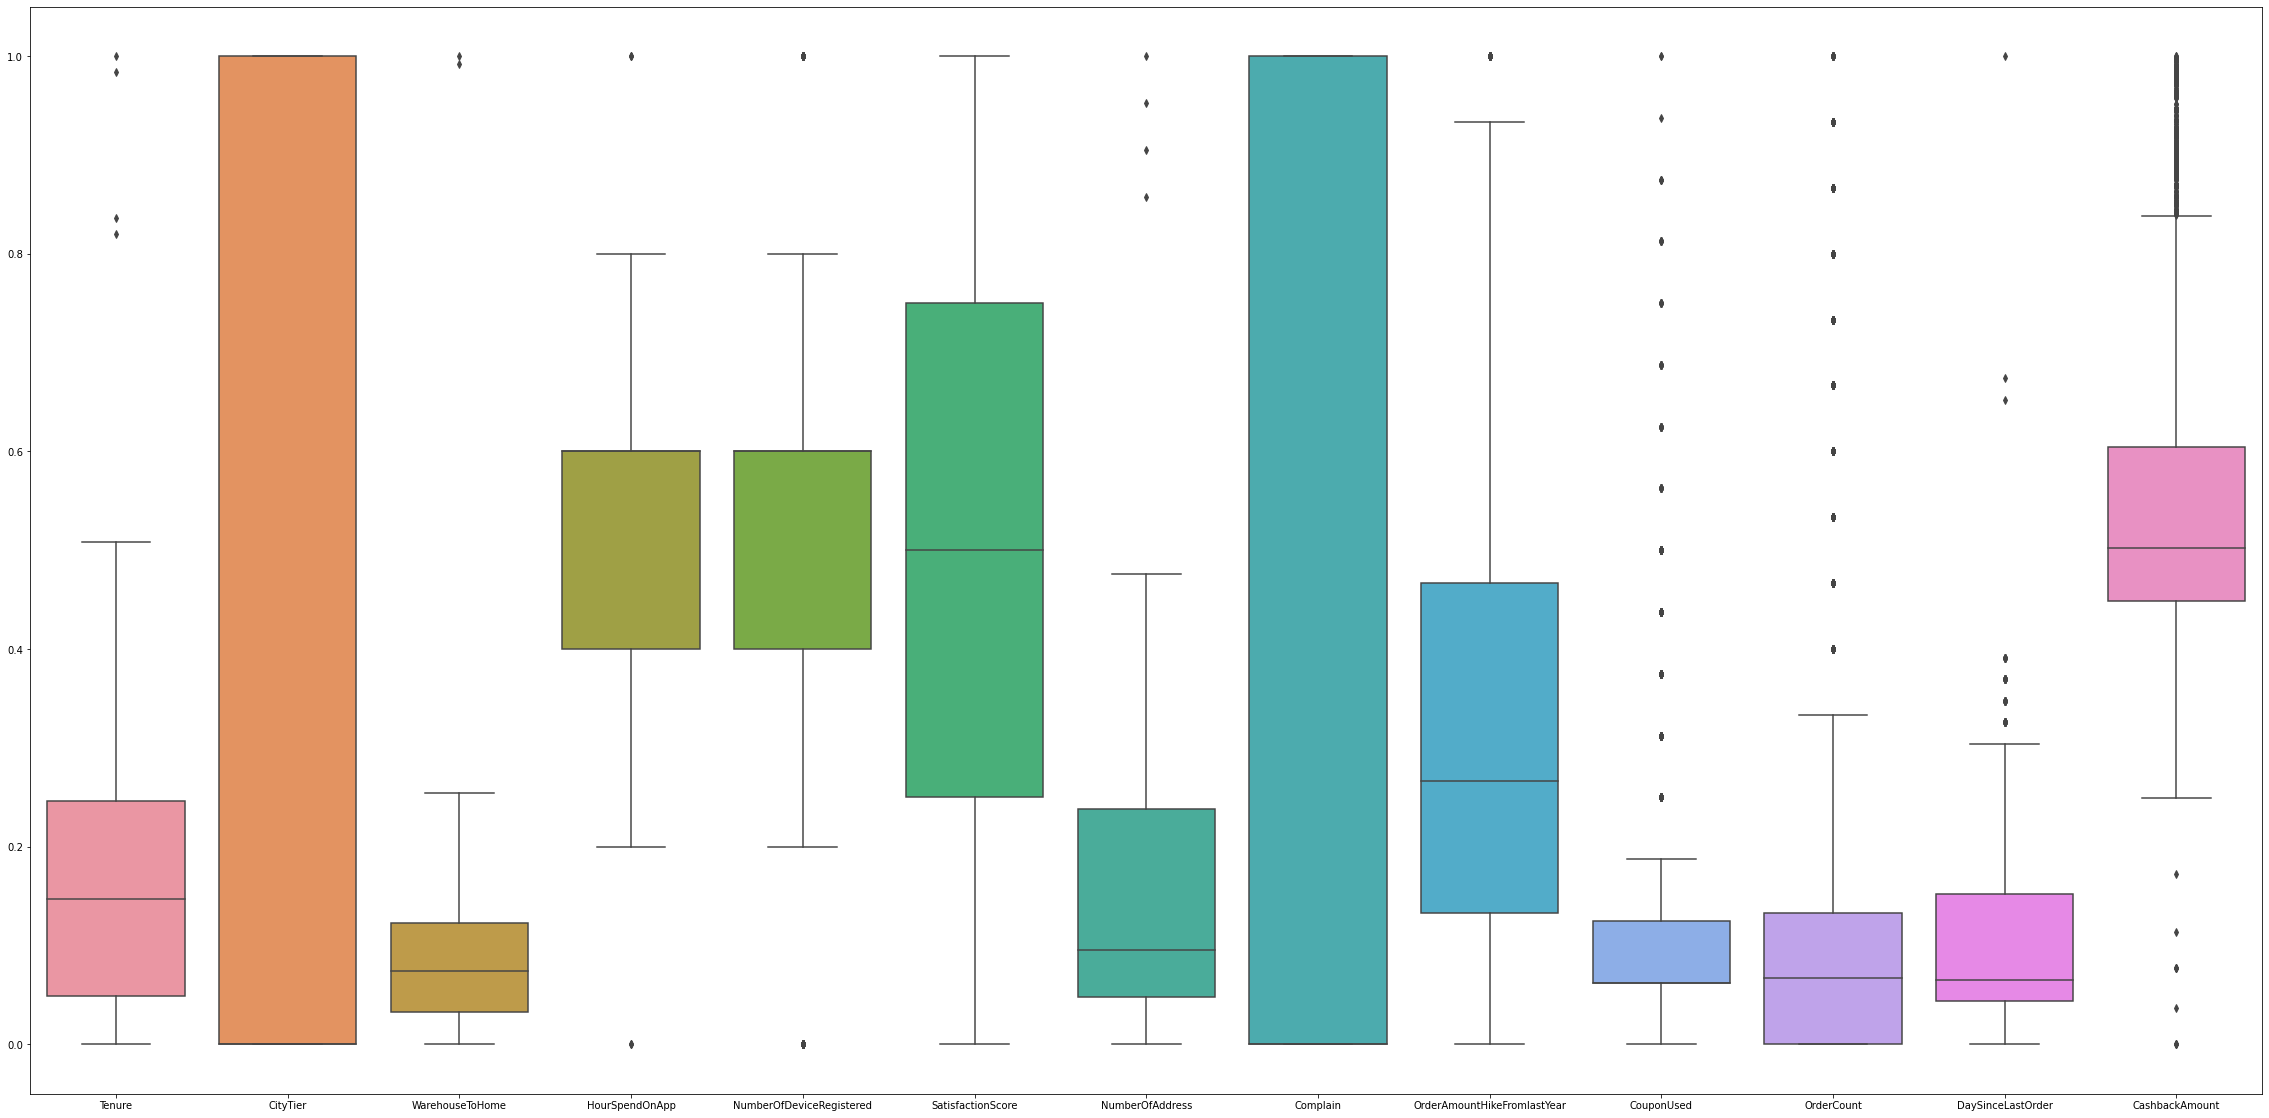

In [14]:
# Detecting and plotting the Outliers 
int_data =  data.loc[:, int_columns_features]

plt.figure(figsize=(40,20))
sns.boxplot(data=int_data)

In [15]:
# Removing the outliers
for column in int_columns_features:
    q1, q3 = data[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    data = data.drop(outliers.index)

<AxesSubplot:>

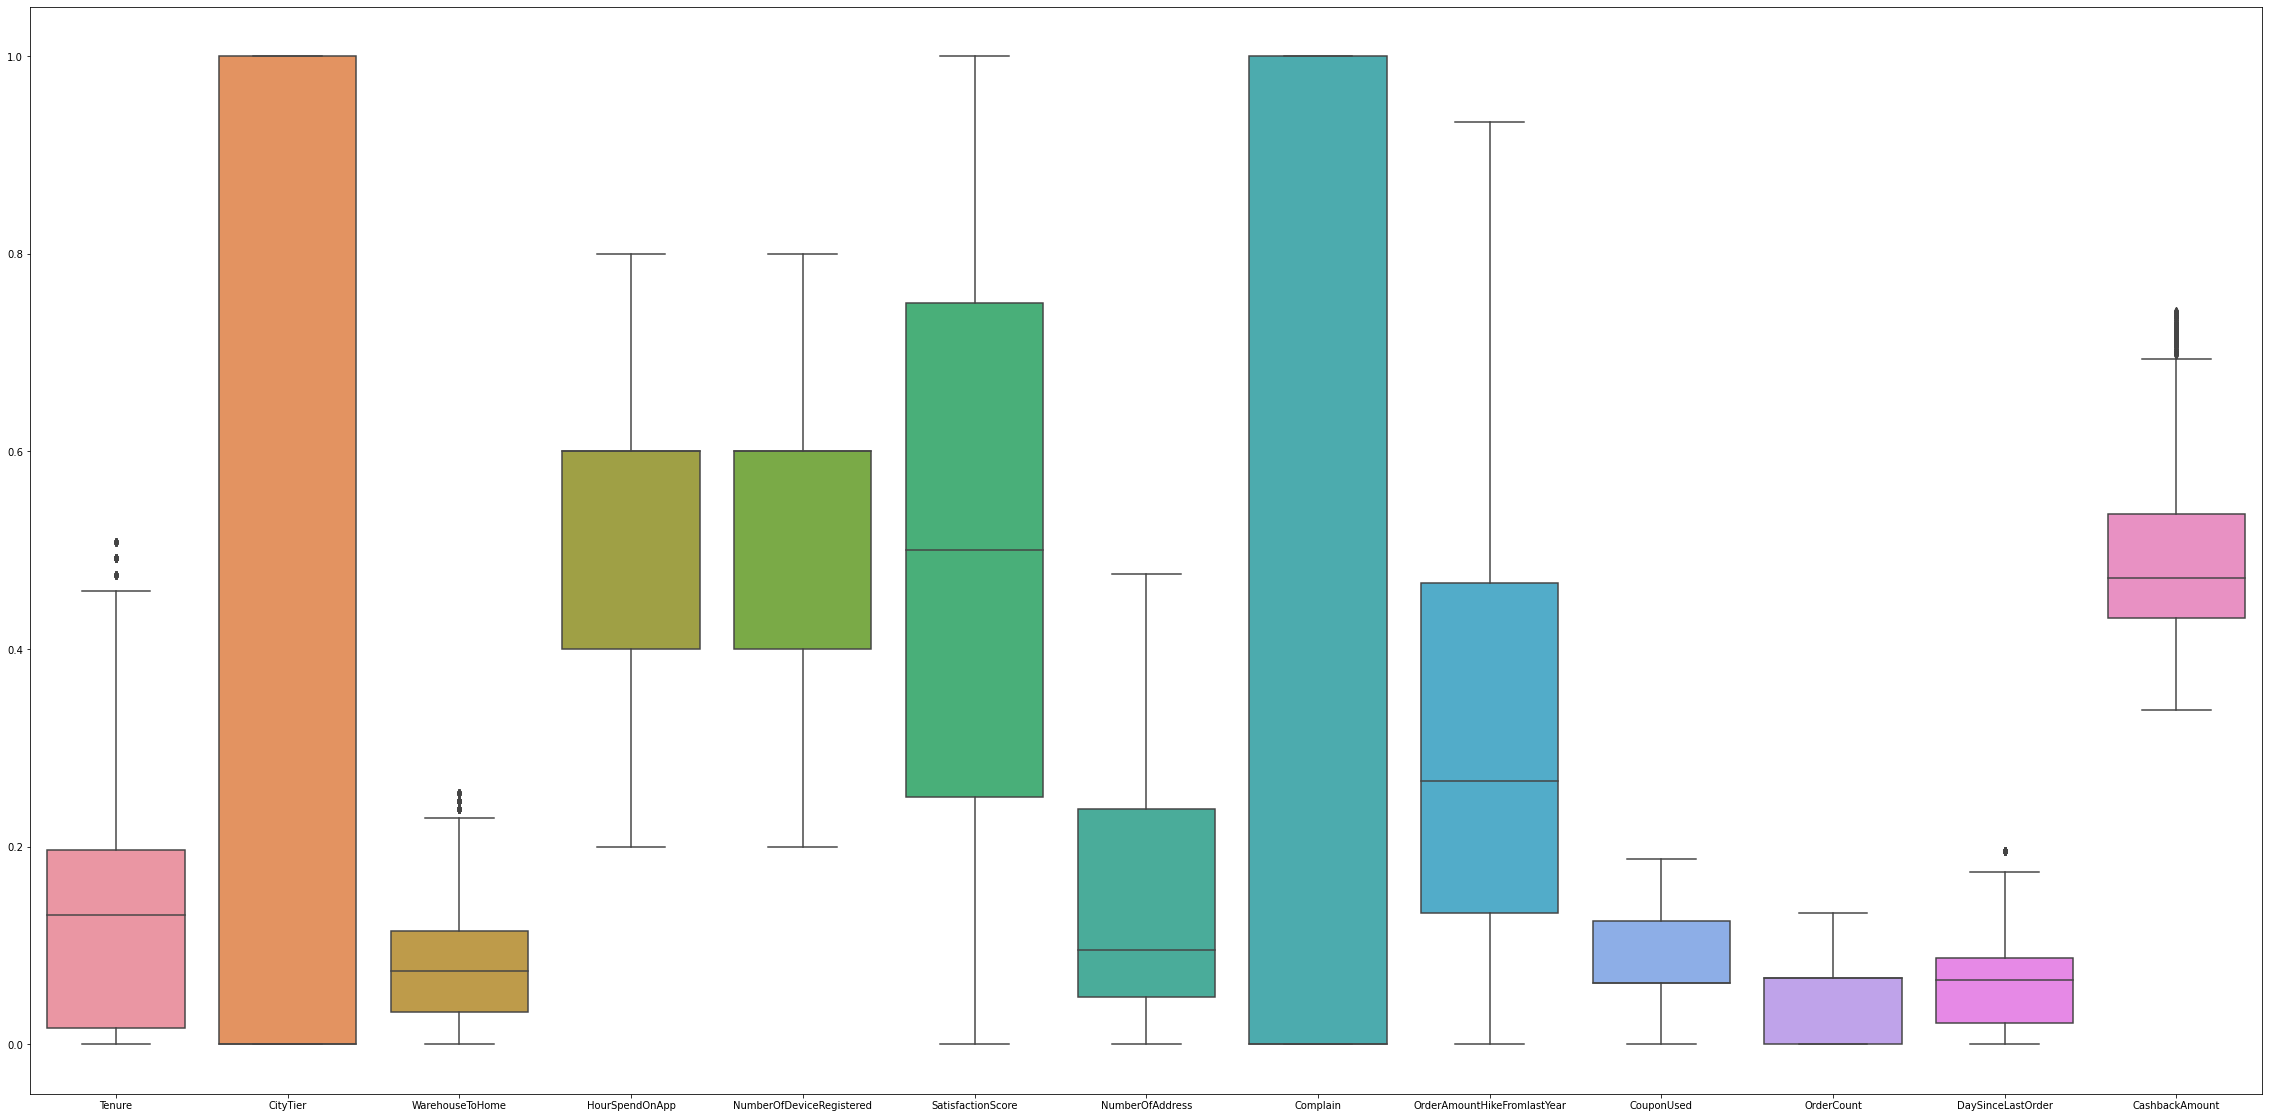

In [16]:
# Plotting the data
int_data =  data.loc[:, int_columns_features]

plt.figure(figsize=(40,20))
sns.boxplot(data=int_data)

<AxesSubplot:>

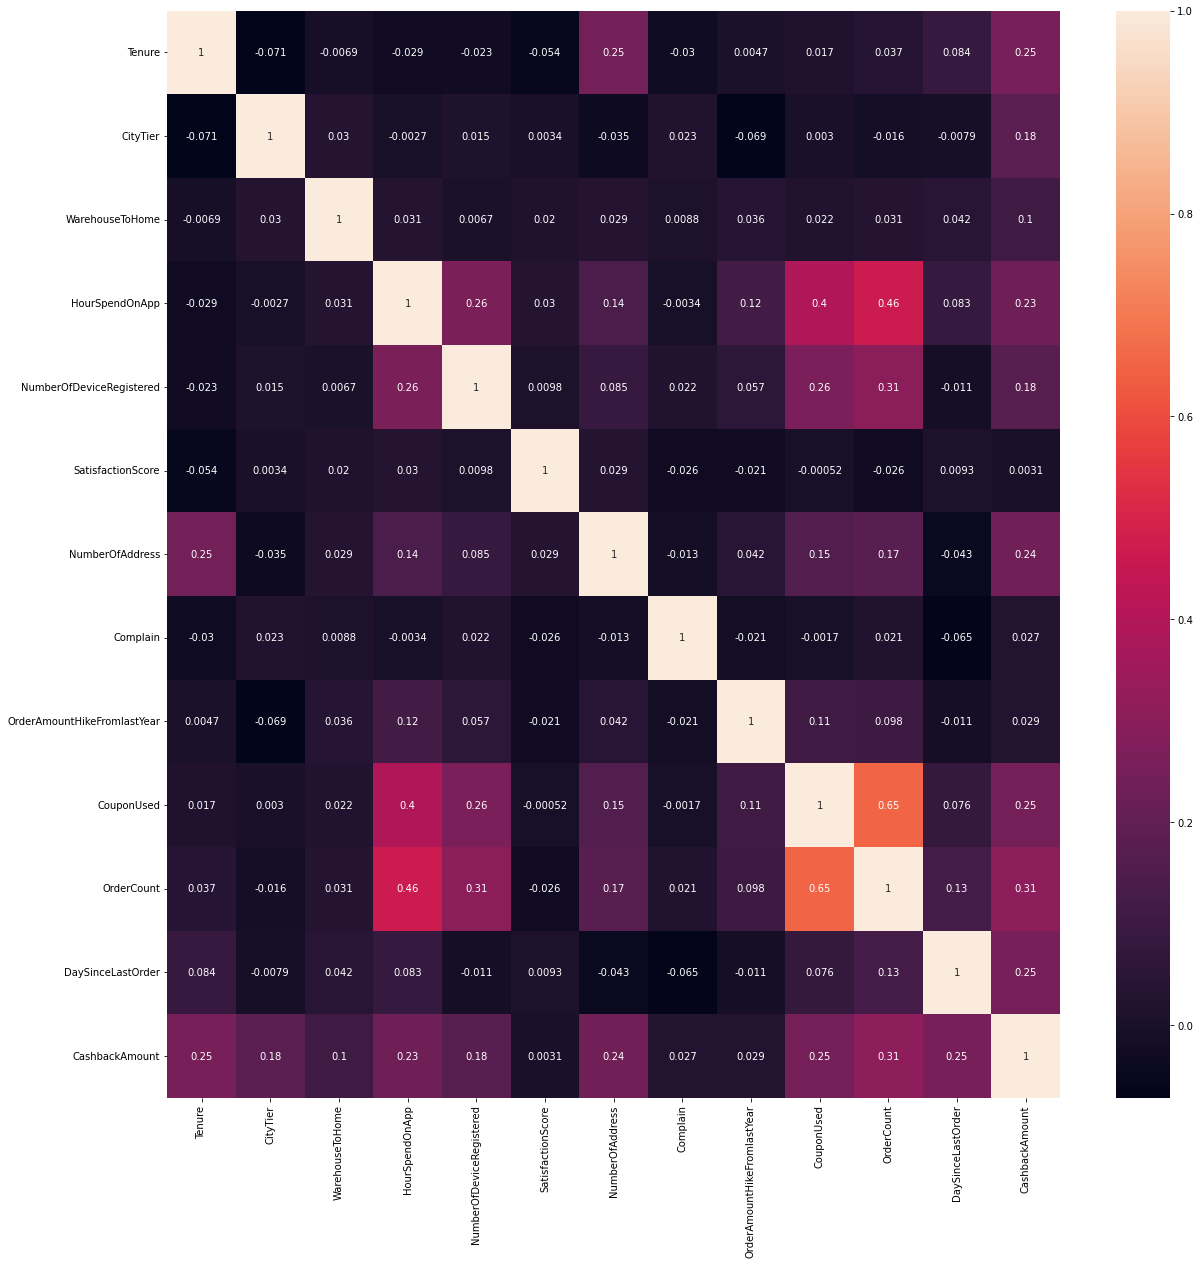

In [17]:
# Plotting the correlation with original data
plt.figure(figsize=(20,20))
sns.heatmap(int_data.corr(),annot=True)

<AxesSubplot:>

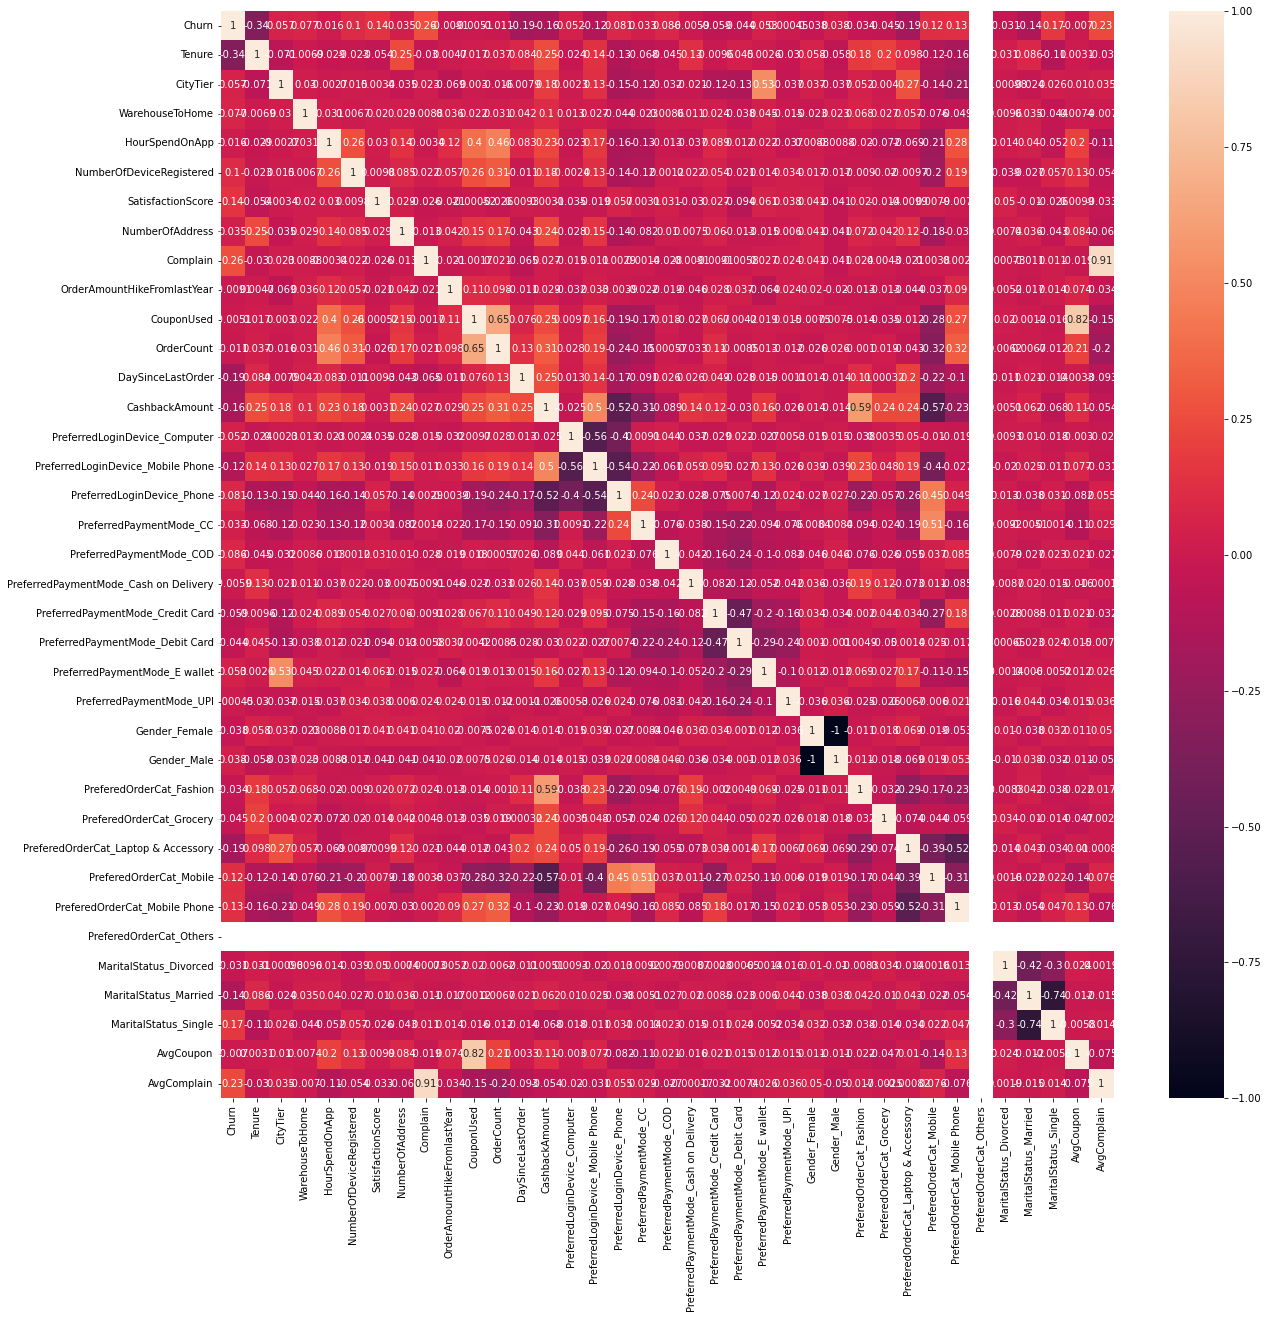

In [18]:
# Plotting the correlation with the data with dummies
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [19]:
# Selecting features and target variable
# Removing the some columns for avoiding multicollinearity
X = data.drop(['Churn','CouponUsed','Complain'], axis=1)
y = data['Churn'] 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [20]:
# Creating the function that shows all selected models' score
def model(X_train, y_train, X_test, y_test):
    
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    rf = RandomForestClassifier(n_estimators=100, max_features=3)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    bag = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)
    
    models = {'Logistic Regression': lr, 'Decision Tree': dt, 'KNN': knn, 'Random Forest': rf,
              'Gradient Boosting': gb,'Bagging Classifier': bag}
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        results[name] = {
            'Accuracy Train': accuracy_score(y_train, y_pred_train),
            'Accuracy Test': accuracy_score(y_test, y_pred_test),
            'Precision Train': precision_score(y_train, y_pred_train),
            'Precision Test': precision_score(y_test, y_pred_test),
            'Confusion Matrix Train': confusion_matrix(y_train, y_pred_train),
            'Confusion Matrix Test': confusion_matrix(y_test, y_pred_test),
            'AUC Train': roc_auc_score(y_train, y_pred_train),
            'AUC Test': roc_auc_score(y_test, y_pred_test),
            'F1 Score Train': f1_score(y_train, y_pred_train),
            'F1 Score Test': f1_score(y_test, y_pred_test),
            'Recall Train': recall_score(y_train, y_pred_train),
            'Recall Test': recall_score(y_test, y_pred_test)
        }
        
    for name, metrics in results.items():
        print('Model: {}'.format(name))
        for metric_name, metric_value in metrics.items():
            print('{}: {}'.format(metric_name, metric_value))
        print()
    best_models = {}
    for metric_name in ['Accuracy Test', 'Precision Test', 'AUC Test', 'F1 Score Test', 'Recall Test']:
        best_models[metric_name] = max(results, key=lambda x: results[x][metric_name])
    
    return best_models

In [21]:
# Run the function 
best_models = model(X_train, y_train, X_test, y_test)
print('Best models based on each metric: {}'.format(best_models))

Model: Logistic Regression
Accuracy Train: 0.8701089148850343
Accuracy Test: 0.8570084666039511
Precision Train: 0.7908745247148289
Precision Test: 0.801980198019802
Confusion Matrix Train: [[1949   55]
 [ 267  208]]
Confusion Matrix Test: [[830  20]
 [132  81]]
AUC Train: 0.7052248135308331
AUC Test: 0.6783761391880695
F1 Score Train: 0.5636856368563686
F1 Score Test: 0.5159235668789809
Recall Train: 0.4378947368421053
Recall Test: 0.38028169014084506

Model: Decision Tree
Accuracy Train: 1.0
Accuracy Test: 0.9303857008466604
Precision Train: 1.0
Precision Test: 0.8262910798122066
Confusion Matrix Train: [[2004    0]
 [   0  475]]
Confusion Matrix Test: [[813  37]
 [ 37 176]]
AUC Train: 1.0
AUC Test: 0.8913808340237502
F1 Score Train: 1.0
F1 Score Test: 0.8262910798122065
Recall Train: 1.0
Recall Test: 0.8262910798122066

Model: KNN
Accuracy Train: 0.8834207341670028
Accuracy Test: 0.8222013170272813
Precision Train: 0.8369565217391305
Precision Test: 0.6071428571428571
Confusion Matr

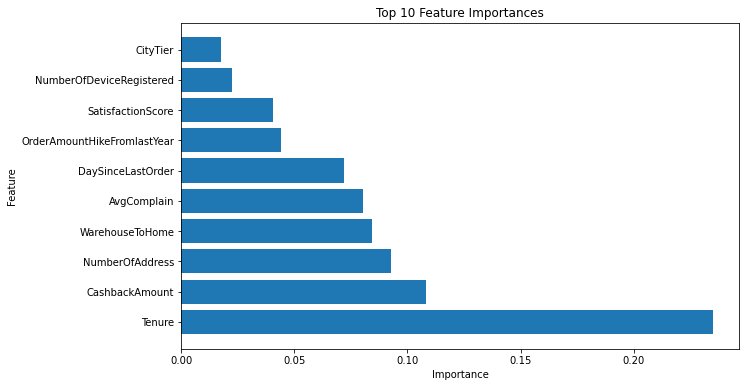

In [22]:
# As the function said that Bagging Classifier is the best model for our data
# Plotting top 10 important features for Bagging Classifier

dt = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)
bgc = bgc.fit(X_train,y_train)

featimp = np.mean([
   tree.feature_importances_ for tree in bgc.estimators_
], axis=0)

feature_importances_bgc = pd.DataFrame({'Feature':X_train.columns,
                            'Importance': featimp}).sort_values('Importance', ascending = False)

top_features = feature_importances_bgc.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

# Data Visualization for Report

Please check the document for the comments.

In [23]:
raw_data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

int_columns = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome'
           , 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
           'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

str_columns = ["PreferredLoginDevice", "PreferredPaymentMode",
                               "Gender","PreferedOrderCat","MaritalStatus"]
for column in raw_data:
    if column in int_columns:
        raw_data[column].fillna(raw_data[column].median(), inplace=True)
    else:
        raw_data[column].fillna(raw_data[column].mode()[0], inplace=True)

raw_data_with_dummies = pd.get_dummies(raw_data, columns=["PreferredLoginDevice", "PreferredPaymentMode",
                               "Gender","PreferedOrderCat","MaritalStatus"])


        
raw_data_with_dummies

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0          50001      1     4.0         3              6.0             3.0   
1          50002      1     9.0         1              8.0             3.0   
2          50003      1     9.0         1             30.0             2.0   
3          50004      1     0.0         3             15.0             2.0   
4          50005      1     0.0         1             12.0             3.0   
...          ...    ...     ...       ...              ...             ...   
5625       55626      0    10.0         1             30.0             3.0   
5626       55627      0    13.0         1             13.0             3.0   
5627       55628      0     1.0         1             11.0             3.0   
5628       55629      0    23.0         3              9.0             4.0   
5629       55630      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      ...  Gender_Male  PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0     ...            0                         0                         0   
1     ...            1                         0                         0   
2     ...            1                         0                         0   
3     ...            1                         0                         0   
4     ...            1                         0                         0   
...   ...          ...                       ...                       ...   
5625  ...            1                         0                         0   
5626  ...            1                         1                         0   
5627  ...            1                         0                         0   
5628  ...            1                         0                         0   
5629  ...            1                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                       1                        0   
1                                       0                        1   
2                                       0                        1   
3                                       1                        0   
4                                       0                        1   
...                                   ...                      ...   
5625                                    1                        0   
5626                                    0                        0   
5627                                    1                        0   
5628                                    1                        0   
5629                                    1                        0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4         

<Figure size 4320x1440 with 0 Axes>

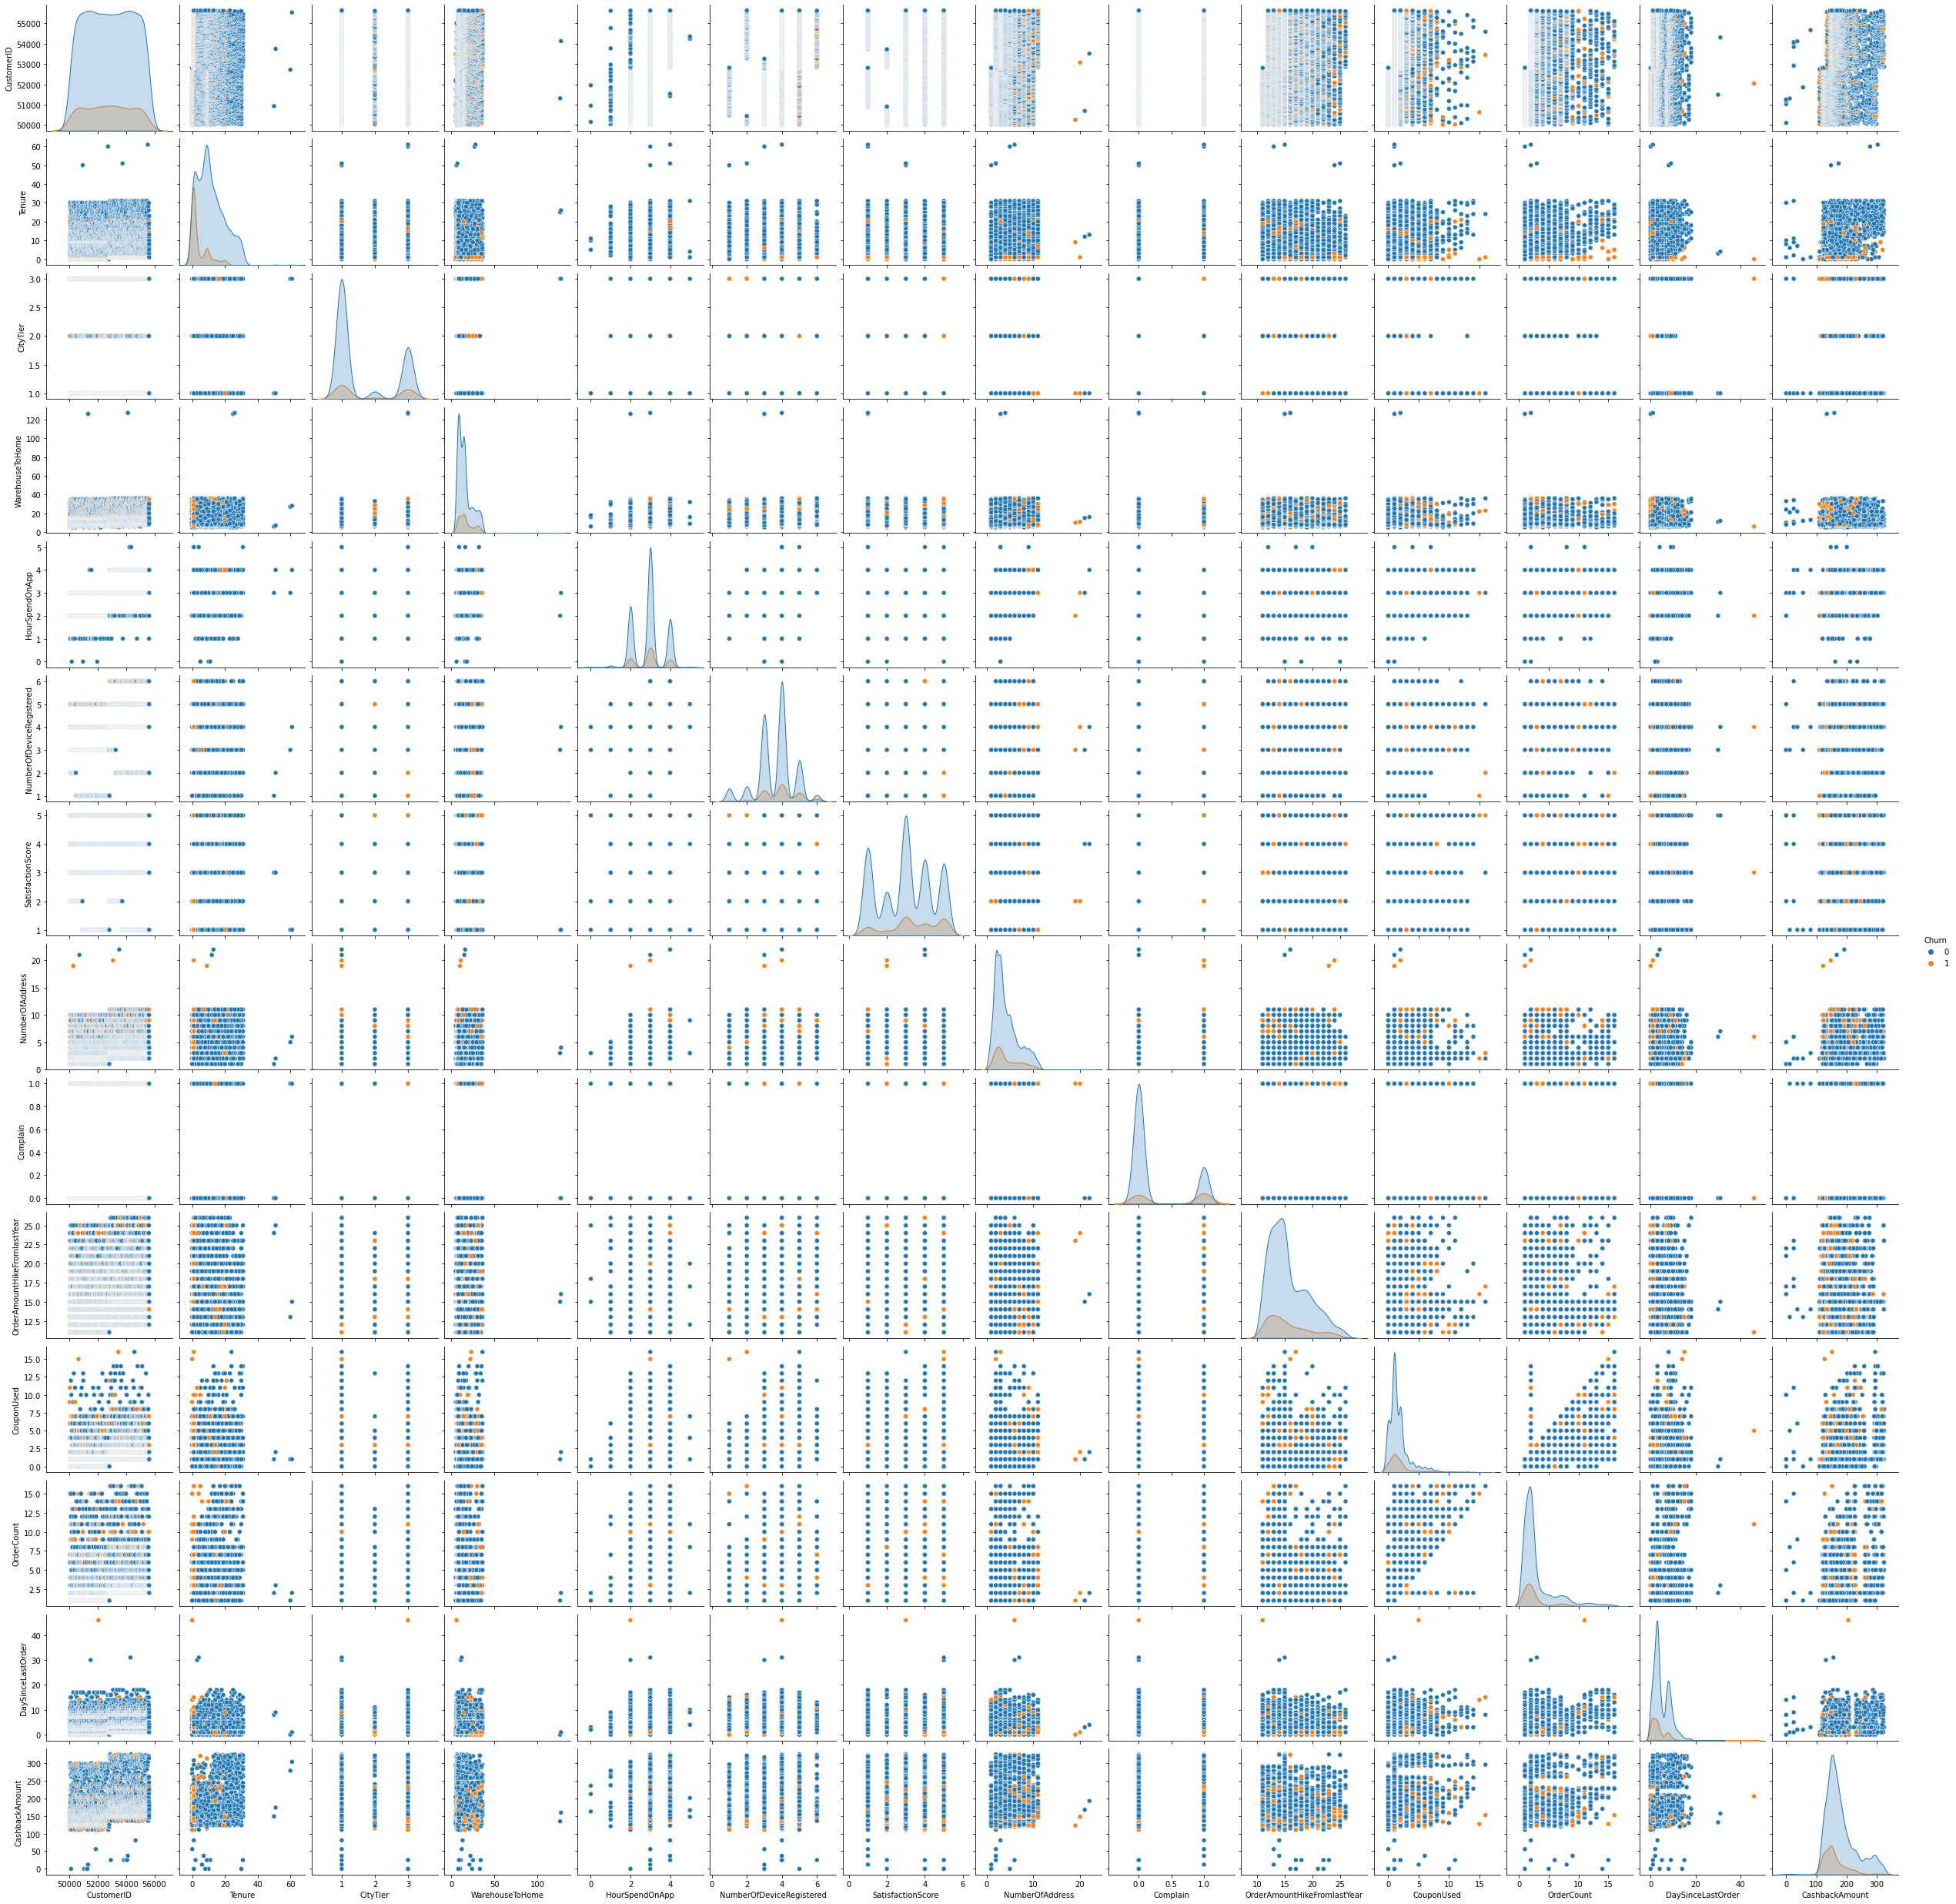

In [24]:
plt.figure(figsize=(60,20))
sns.pairplot(data=raw_data,kind='scatter',hue='Churn')
plt.show()

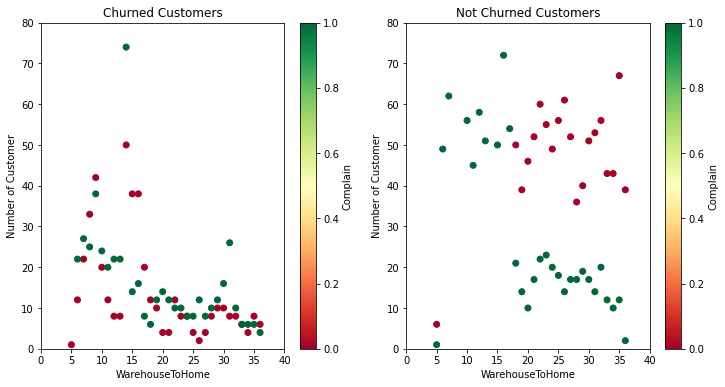

In [25]:
a = raw_data.groupby(['Complain','Churn','WarehouseToHome']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['WarehouseToHome'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['Complain'],cmap=cm.RdYlGn)
ax1.set_xlabel('WarehouseToHome')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
ax1.set_ylim(0,80)
ax1.set_xlim(0,40)
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('Complain')

sc2 = ax2.scatter(a[a['Churn']==0]['WarehouseToHome'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['Complain'],cmap=cm.RdYlGn)
ax2.set_xlabel('WarehouseToHome')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
ax2.set_ylim(0,80)
ax2.set_xlim(0,40)
cbar1 = plt.colorbar(sc1, ax=ax2)
cbar1.set_label('Complain')

plt.show()

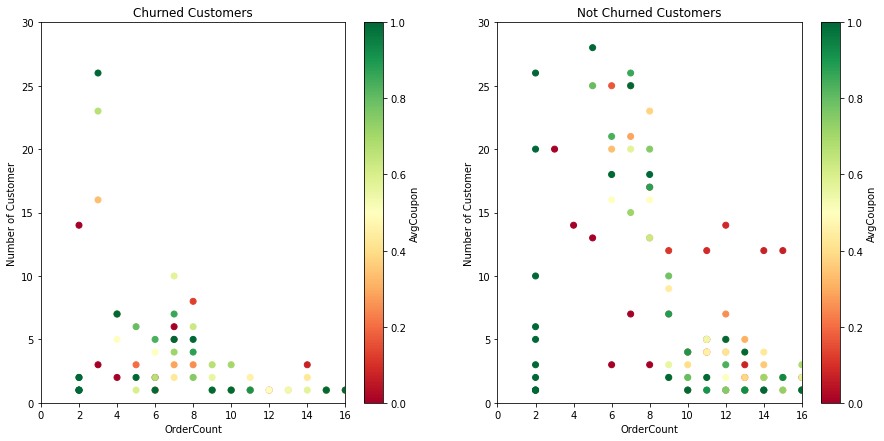

In [26]:
a = raw_data.groupby(['OrderCount','Churn','CouponUsed']).agg({'CustomerID':'nunique'}).reset_index()
a['AvgCoupon'] = a['CouponUsed'] / a['OrderCount']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sc1 = ax1.scatter(a[a['Churn']==1]['OrderCount'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['AvgCoupon'],cmap=cm.RdYlGn, vmin=0, vmax=1)
ax1.set_xlabel('OrderCount')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
ax1.set_xlim(0,16)
ax1.set_ylim(0,30)
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('AvgCoupon')

sc2 = ax2.scatter(a[a['Churn']==0]['OrderCount'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['AvgCoupon'],cmap=cm.RdYlGn, vmin=0, vmax=1)
ax2.set_xlabel('OrderCount')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
ax2.set_xlim(0,16)
ax2.set_ylim(0,30)
cbar2 = plt.colorbar(sc2, ax=ax2)
cbar2.set_label('AvgCoupon')

plt.show()

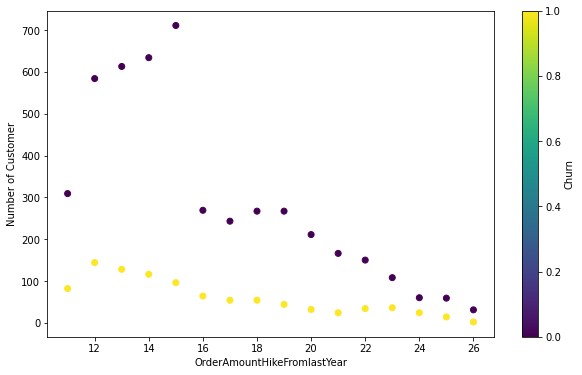

In [27]:
a = raw_data.groupby(['Churn','OrderAmountHikeFromlastYear']).agg({'CustomerID':'nunique'}).reset_index()

fig = plt.figure(figsize = (10,6))
plt.scatter(a['OrderAmountHikeFromlastYear'], a['CustomerID'], c=a['Churn'])
plt.xlabel('OrderAmountHikeFromlastYear')
plt.ylabel('Number of Customer')
plt.colorbar(label='Churn')
plt.show()

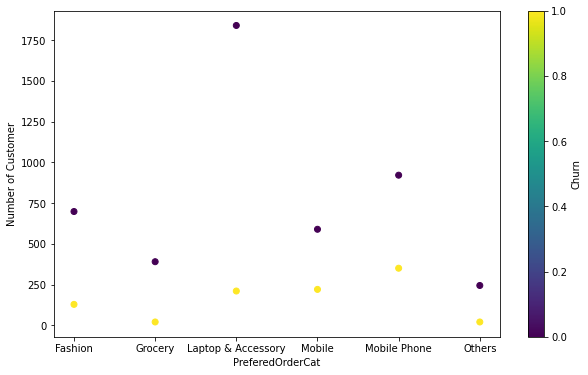

In [28]:
a = raw_data.groupby(['Churn','PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()

fig = plt.figure(figsize = (10,6))
plt.scatter(a['PreferedOrderCat'], a['CustomerID'], c=a['Churn'])
plt.xlabel('PreferedOrderCat')
plt.ylabel('Number of Customer')
plt.colorbar(label='Churn')
plt.show()

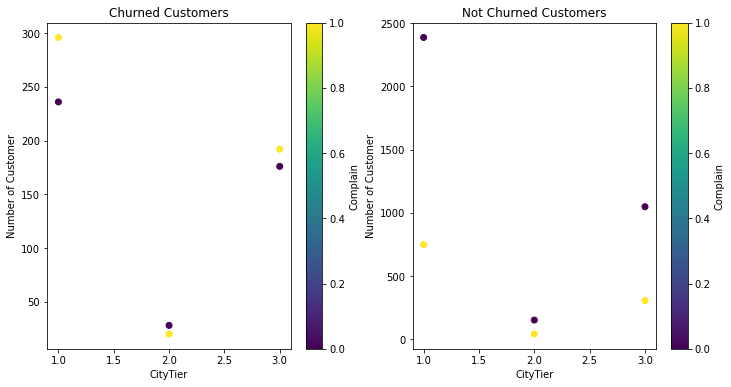

In [29]:
a = raw_data.groupby(['Churn','CityTier','Complain']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['CityTier'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['Complain'])
ax1.set_xlabel('CityTier')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('Complain')

sc2 = ax2.scatter(a[a['Churn']==0]['CityTier'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['Complain'])
ax2.set_xlabel('CityTier')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('Complain')

plt.show()

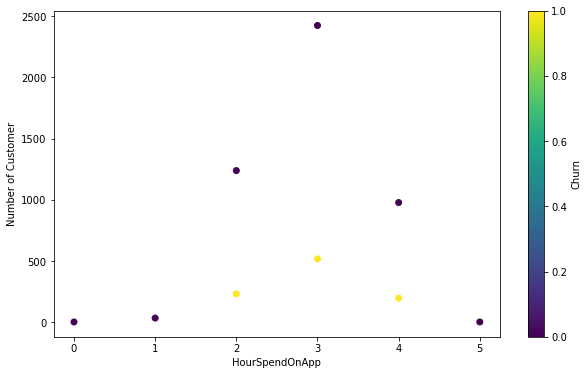

In [30]:
a = raw_data.groupby(['Churn','HourSpendOnApp']).agg({'CustomerID':'nunique'}).reset_index()

fig = plt.figure(figsize = (10,6))
plt.scatter(a['HourSpendOnApp'], a['CustomerID'], c=a['Churn'])
plt.xlabel('HourSpendOnApp')
plt.ylabel('Number of Customer')
plt.colorbar(label='Churn')
plt.show()

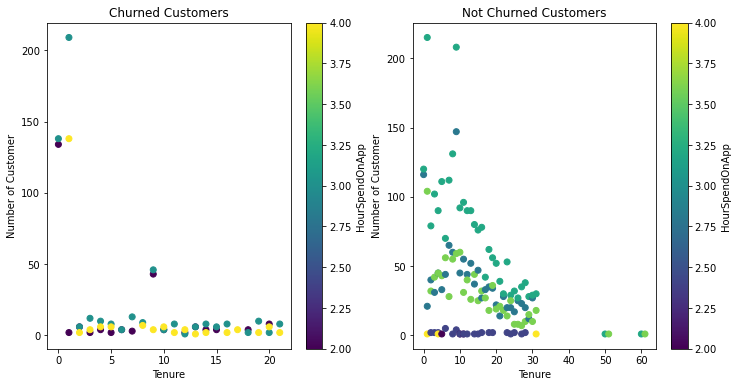

In [31]:
a = raw_data.groupby(['Churn','Tenure','HourSpendOnApp']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['Tenure'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['HourSpendOnApp'])
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('HourSpendOnApp')

sc2 = ax2.scatter(a[a['Churn']==0]['Tenure'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['HourSpendOnApp'])
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('HourSpendOnApp')

plt.show()

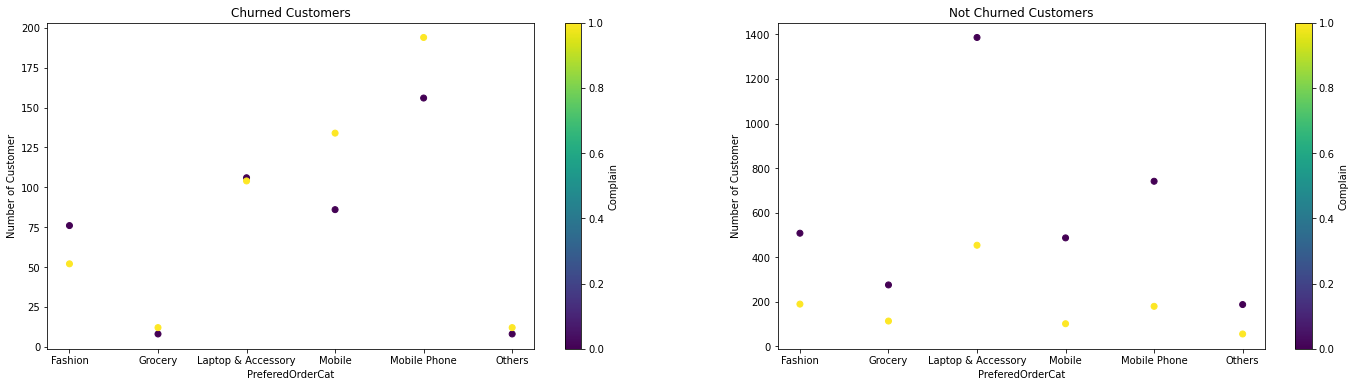

In [32]:
a = raw_data.groupby(['Churn','PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['PreferedOrderCat'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['Complain'])
ax1.set_xlabel('PreferedOrderCat')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('Complain')

sc2 = ax2.scatter(a[a['Churn']==0]['PreferedOrderCat'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['Complain'])
ax2.set_xlabel('PreferedOrderCat')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('Complain')

plt.show()

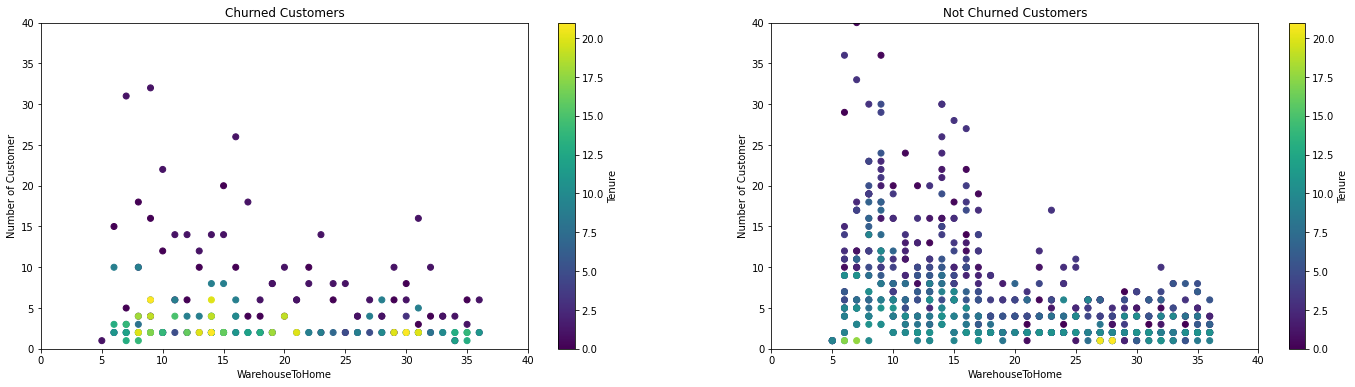

In [33]:
a = raw_data.groupby(['Churn','Tenure','WarehouseToHome']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['WarehouseToHome'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['Tenure'])
ax1.set_xlabel('WarehouseToHome')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
ax1.set_xlim(0,40)
ax1.set_ylim(0,40)
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('Tenure')

sc2 = ax2.scatter(a[a['Churn']==0]['WarehouseToHome'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['Tenure'])
ax2.set_xlabel('WarehouseToHome')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
ax2.set_xlim(0,40)
ax2.set_ylim(0,40)
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('Tenure')

plt.show()

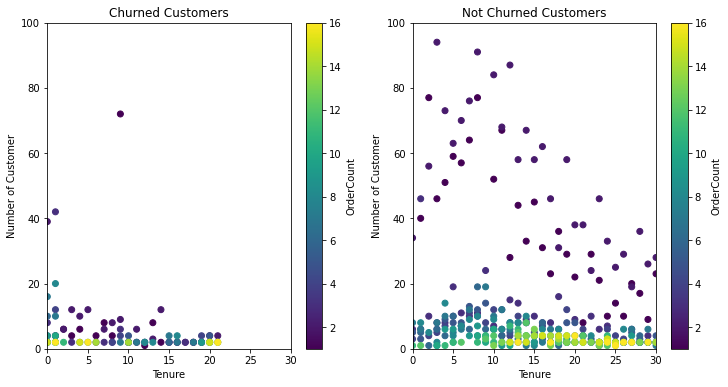

In [34]:
a = raw_data.groupby(['Churn','OrderCount','Tenure']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['Tenure'], a[a['Churn']==1]['CustomerID'], c=a[a['Churn']==1]['OrderCount'])
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Number of Customer')
ax1.set_title('Churned Customers')
ax1.set_xlim(0,30)
ax1.set_ylim(0,100)
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('OrderCount')

sc2 = ax2.scatter(a[a['Churn']==0]['Tenure'], a[a['Churn']==0]['CustomerID'], c=a[a['Churn']==0]['OrderCount'])
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Number of Customer')
ax2.set_title('Not Churned Customers')
ax2.set_xlim(0, 30)
ax2.set_ylim(0,100)
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('OrderCount')

plt.show()

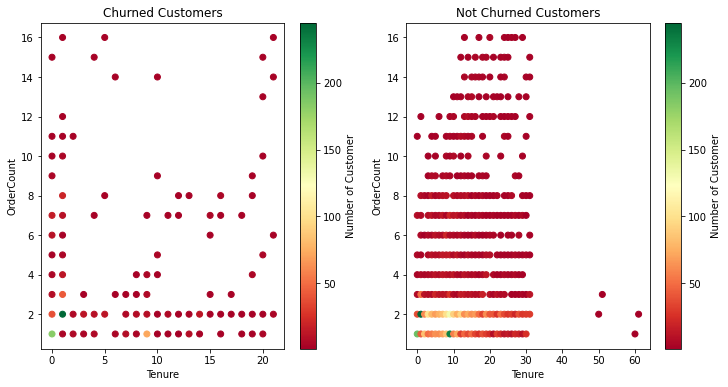

In [35]:
a = raw_data.groupby(['Churn','OrderCount','Tenure']).agg({'CustomerID':'nunique'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax1.scatter(a[a['Churn']==1]['Tenure'], a[a['Churn']==1]['OrderCount'], c=a[a['Churn']==1]['CustomerID'],cmap=cm.RdYlGn)
ax1.set_xlabel('Tenure')
ax1.set_ylabel('OrderCount')
ax1.set_title('Churned Customers')
cbar1 = plt.colorbar(sc1, ax=ax1)
cbar1.set_label('Number of Customer')

sc2 = ax2.scatter(a[a['Churn']==0]['Tenure'], a[a['Churn']==0]['OrderCount'], c=a[a['Churn']==0]['CustomerID'],cmap=cm.RdYlGn)
ax2.set_xlabel('Tenure')
ax2.set_ylabel('OrderCount')
ax2.set_title('Not Churned Customers')
cbar2 = plt.colorbar(sc1, ax=ax2)
cbar2.set_label('Number of Customer')

plt.show()